# Importing tools

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing dataset

In [2]:
df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Exploring Dataset

In [4]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are 201 missing values in bmi column

In [5]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

This dataset contains small amount of people who had stroke as compared to people who did not.

In [7]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [8]:
for index, row in df.iterrows():
    if row["gender"] == "Other":
        print(row)

id                             56156
gender                         Other
age                             26.0
hypertension                       0
heart_disease                      0
ever_married                      No
work_type                    Private
Residence_type                 Rural
avg_glucose_level             143.33
bmi                             22.4
smoking_status       formerly smoked
stroke                             0
Name: 3116, dtype: object


Deleting 1 value of `other` gender as it is an outlier.

In [9]:
df = df.drop(3116, axis=0)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [10]:
ct = pd.crosstab(df["gender"], df["stroke"])
ct

stroke,0,1
gender,,
Female,2853,141
Male,2007,108


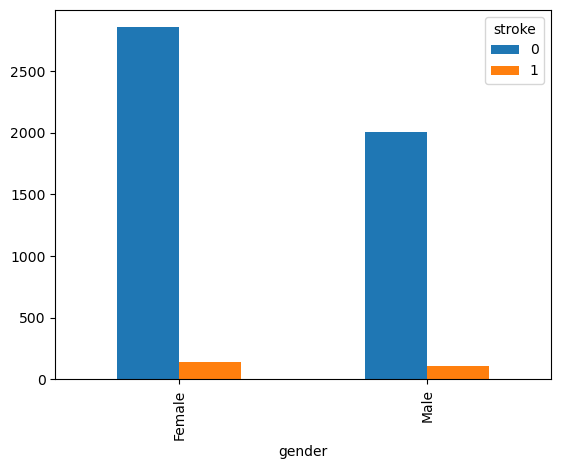

In [11]:
ct.plot(kind="bar");

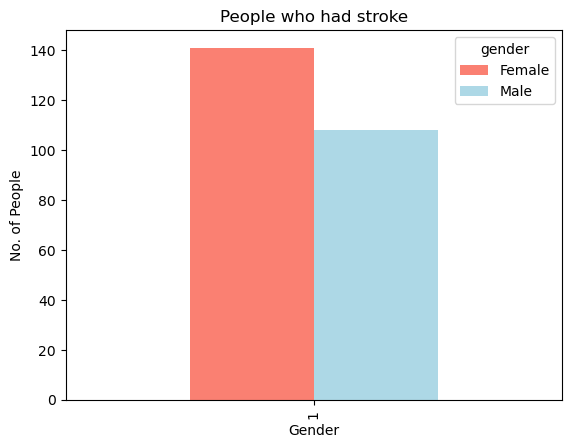

In [12]:
pd.crosstab(df.stroke[df.stroke==1], df.gender).plot(kind="bar", color=["salmon", "lightblue"])
plt.xlabel("Gender")
plt.ylabel("No. of People")
plt.title("People who had stroke");

There more `Females` who had stroke as compared to `Males`

In [13]:
pd.crosstab(df["age"], df["stroke"])

stroke,0,1
age,,
0.08,2,0
0.16,3,0
0.24,5,0
0.32,5,0
0.40,2,0
...,...,...
78.00,81,21
79.00,68,17
80.00,53,17


Text(0, 0.5, 'BMI')

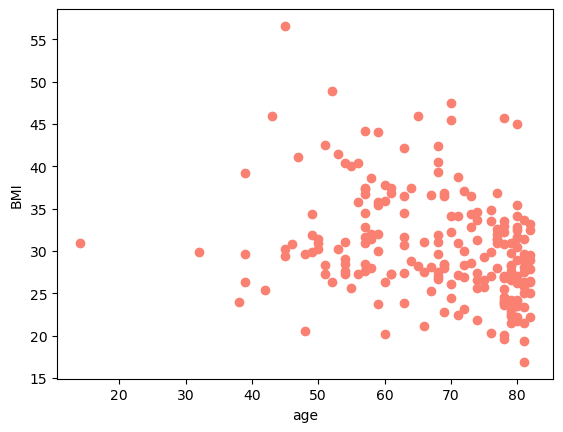

In [14]:
plt.scatter(df.age[df.stroke==1], df.bmi[df["stroke"]==1], c="salmon")
plt.xlabel("age")
plt.ylabel("BMI")

Text(0, 0.5, 'avg Glucose Level')

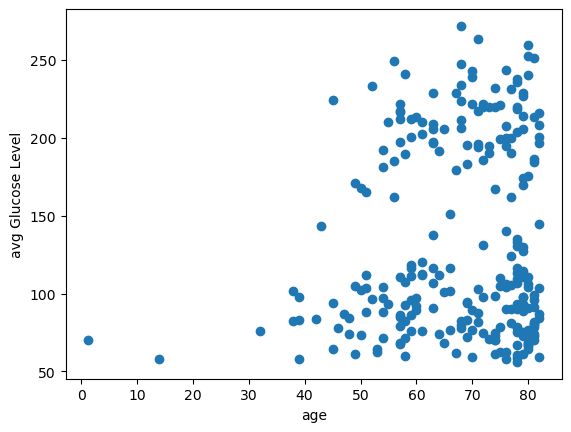

In [15]:
plt.scatter(df.age[df.stroke==1], df.avg_glucose_level[df.stroke==1])
plt.xlabel("age")
plt.ylabel("avg Glucose Level")

In [16]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [17]:
pd.crosstab(df.heart_disease, df.stroke)

stroke,0,1
heart_disease,,
0,4631,202
1,229,47


<Axes: xlabel='heart_disease'>

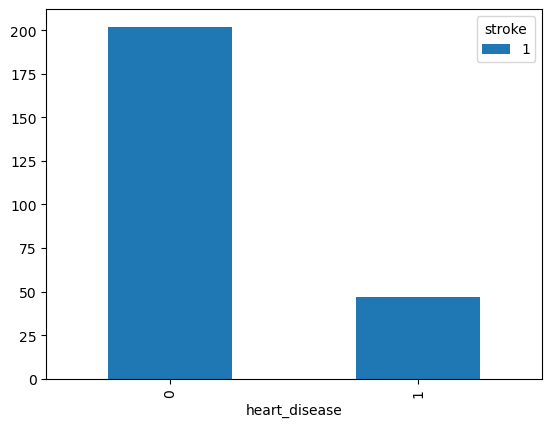

In [18]:
pd.crosstab(df.heart_disease, df.stroke[df.stroke==1]).plot(kind="bar")

There are more people who had heart disease but did not have any stroke.

In [19]:
pd.crosstab(df.smoking_status, df.stroke)

stroke,0,1
smoking_status,,
Unknown,1497,47
formerly smoked,814,70
never smoked,1802,90
smokes,747,42


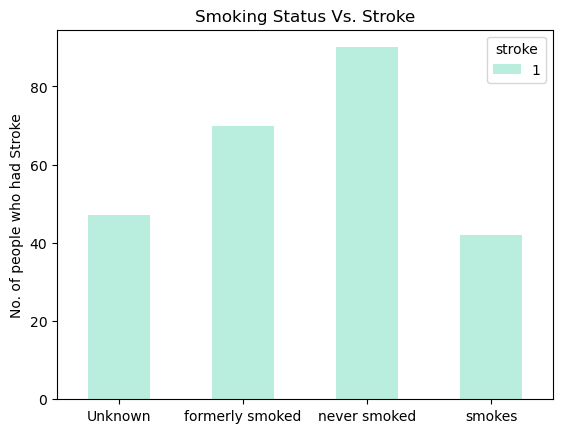

In [20]:
c = ["#B9EDDD", "#87CBB9", "#569DAA", "#577D86"]
pd.crosstab(df.smoking_status, df.stroke[df.stroke==1]).plot(kind="bar", color=c);
plt.ylabel("No. of people who had Stroke")
plt.xlabel("")
plt.title("Smoking Status Vs. Stroke");
plt.xticks(rotation=0);

In [21]:
pd.crosstab(df.Residence_type, df.stroke)

stroke,0,1
Residence_type,,
Rural,2399,114
Urban,2461,135


In [22]:
df.Residence_type.value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

This dataset has balanced number of people from Rural and Urban

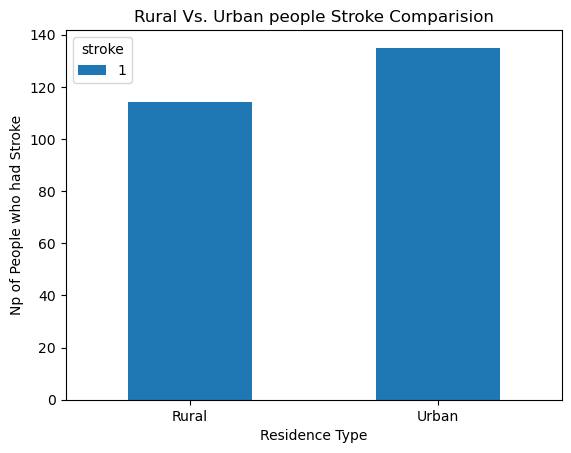

In [23]:
pd.crosstab(df.Residence_type, df.stroke[df.stroke==1]).plot(kind="bar")
plt.xlabel("Residence Type")
plt.ylabel("Np of People who had Stroke")
plt.title("Rural Vs. Urban people Stroke Comparision")
plt.xticks(rotation=0);

In [24]:
pd.crosstab(df.gender, df.heart_disease)

heart_disease,0,1
gender,,
Female,2881,113
Male,1952,163


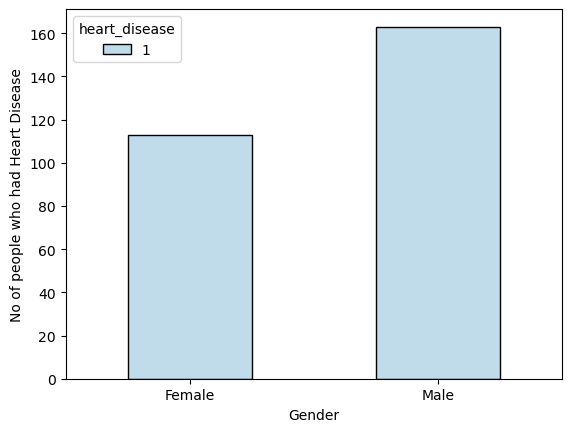

In [25]:
pd.crosstab(df.gender, df.heart_disease[df.heart_disease==1]).plot(kind="bar", color="#C0DBEA", edgecolor="black")
plt.xlabel("Gender")
plt.ylabel("No of people who had Heart Disease")
plt.xticks(rotation=0);

In [26]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [27]:
df.bmi.median()

28.1

In [28]:
df.bmi.mean()

28.894559902200488

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 647.9+ KB


C:\Users\samee\AppData\Local\Temp\ipykernel_15872\1090855348.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


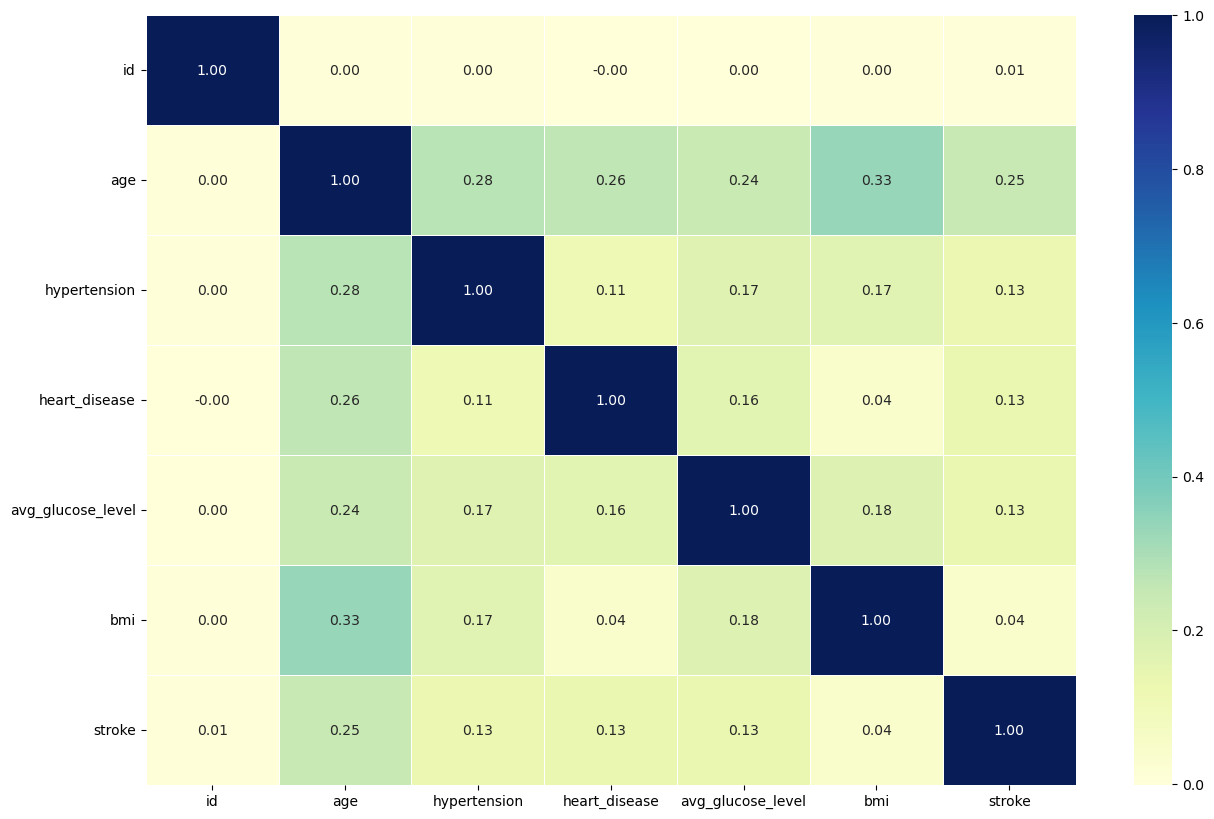

In [30]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

# Manipulating Data

In [31]:
df_mod = df
df_mod

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [32]:
# drop rows with NaN or null values
df_mod = df_mod.dropna()

# convert age column to integer
df_mod['age'] = df_mod['age'].astype(int)

# print the updated dataframe
df_mod['age'].dtype

C:\Users\samee\AppData\Local\Temp\ipykernel_15872\3123355018.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['age'] = df_mod['age'].astype(int)


dtype('int32')

In [33]:
# Checking how many zero values in age column
number=0
for age in df_mod.age:
    if age==0:
        number+=1
print(number)

42


In [34]:
# check for zeros in age column
zero_age = df_mod['age'] == 0

# print the rows with zero age
print(df_mod[zero_age])

         id  gender  age  hypertension  heart_disease ever_married work_type  \
363    7559  Female    0             0              0           No  children   
376   22706  Female    0             0              0           No  children   
564   61511  Female    0             0              0           No  children   
982   54747    Male    0             0              0           No  children   
996   53279    Male    0             0              0           No  children   
1093  66772  Female    0             0              0           No  children   
1206  68908  Female    0             0              0           No  children   
1317  30084    Male    0             0              0           No  children   
1600  40544    Male    0             0              0           No  children   
1614  47350  Female    0             0              0           No  children   
1808  53126  Female    0             0              0           No  children   
1975   6596    Male    0             0  

In [35]:
print(df_mod.loc[363])

id                       7559
gender                 Female
age                         0
hypertension                0
heart_disease               0
ever_married               No
work_type            children
Residence_type          Urban
avg_glucose_level       83.82
bmi                      24.9
smoking_status        Unknown
stroke                      0
Name: 363, dtype: object


In [36]:
# create a new dataframe without the rows with zero age
df_mod = df_mod[df_mod['age'] != 0]

# print the new dataframe
df_mod

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [37]:
df_mod.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [38]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4866 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4866 non-null   int64  
 1   gender             4866 non-null   object 
 2   age                4866 non-null   int32  
 3   hypertension       4866 non-null   int64  
 4   heart_disease      4866 non-null   int64  
 5   ever_married       4866 non-null   object 
 6   work_type          4866 non-null   object 
 7   Residence_type     4866 non-null   object 
 8   avg_glucose_level  4866 non-null   float64
 9   bmi                4866 non-null   float64
 10  smoking_status     4866 non-null   object 
 11  stroke             4866 non-null   int64  
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 475.2+ KB


In [39]:
# Checking for string null values
for column, row in df_mod.items():
    if pd.api.types.is_string_dtype(row):
        if pd.isna(row).sum():
            print(column)

In [40]:
# Checking for numeric null values
for column, row in df_mod.items():
    if pd.api.types.is_numeric_dtype(row):
        if pd.isna(row).sum():
            print(column)

In [41]:
# Checking for string data types
for column, row in df_mod.items():
    if pd.api.types.is_string_dtype(row):
        print(column)

gender
ever_married
work_type
Residence_type
smoking_status


# Testing

# Modelling

In [42]:
X = df_mod.drop("stroke", axis=1)
y = df_mod.stroke

In [43]:
# converting object dtype to categorical dtype before using onehotencoder
for column, row in df_mod.items():
    if pd.api.types.is_string_dtype(row):
        df_mod[column] = row.astype("category").cat.as_ordered()

In [44]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4866 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 4866 non-null   int64   
 1   gender             4866 non-null   category
 2   age                4866 non-null   int32   
 3   hypertension       4866 non-null   int64   
 4   heart_disease      4866 non-null   int64   
 5   ever_married       4866 non-null   category
 6   work_type          4866 non-null   category
 7   Residence_type     4866 non-null   category
 8   avg_glucose_level  4866 non-null   float64 
 9   bmi                4866 non-null   float64 
 10  smoking_status     4866 non-null   category
 11  stroke             4866 non-null   int64   
dtypes: category(5), float64(2), int32(1), int64(4)
memory usage: 309.6 KB


In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features,)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[  0.  ,   1.  ,   0.  , ...,   1.  , 228.69,  36.6 ],
       [  0.  ,   1.  ,   0.  , ...,   1.  , 105.92,  32.5 ],
       [  1.  ,   0.  ,   0.  , ...,   0.  , 171.23,  34.4 ],
       ...,
       [  1.  ,   0.  ,   0.  , ...,   0.  ,  82.99,  30.6 ],
       [  0.  ,   1.  ,   0.  , ...,   0.  , 166.29,  25.6 ],
       [  1.  ,   0.  ,   0.  , ...,   0.  ,  85.28,  26.2 ]])

In [46]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,9046.0,67.0,0.0,1.0,228.69,36.6
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,31112.0,80.0,0.0,1.0,105.92,32.5
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,60182.0,49.0,0.0,0.0,171.23,34.4
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1665.0,79.0,1.0,0.0,174.12,24.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,56669.0,81.0,0.0,0.0,186.21,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,14180.0,13.0,0.0,0.0,103.08,18.6
4862,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,44873.0,81.0,0.0,0.0,125.20,40.0
4863,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,19723.0,35.0,0.0,0.0,82.99,30.6
4864,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,37544.0,51.0,0.0,0.0,166.29,25.6


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2, random_state=42)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_score = rfc.score(X_test, y_test)
rfc_score

0.9455852156057495

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
knc_score = knc.score(X_test, y_test)
knc_score

0.9455852156057495

In [49]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc_score = svc.score(X_test, y_test)
svc_score

0.944558521560575

In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
lr_score

D:\Miniconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.944558521560575

In [51]:
model_scores = {
    "KNeighborsClassifier" : knc_score*100,
    "Random Forest Classifier" : rfc_score*100,
    "Logistic Regression" : lr_score*100,
    "SVC" : svc_score*100
}
model_scores

{'KNeighborsClassifier': 94.55852156057495,
 'Random Forest Classifier': 94.55852156057495,
 'Logistic Regression': 94.45585215605749,
 'SVC': 94.45585215605749}

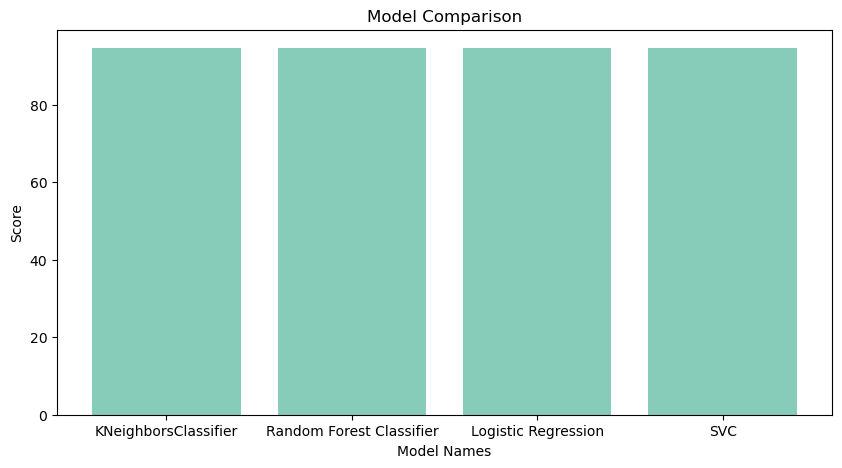

In [52]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(model_compare.columns, model_compare.iloc[0], color="#87CBB9")
plt.xlabel("Model Names")
plt.ylabel("Score")
# plt.xticks(rotation=0)
plt.title("Model Comparison");

In [53]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr, transformed_X, y, cv=5)

print("Cross-validation scores:", score)
print("Average score:", score.mean())
avg_score_lr = score.mean()

Cross-validation scores: [0.95687885 0.95375128 0.95786228 0.95477903 0.95786228]
Average score: 0.9562267463823015


In [54]:
score = cross_val_score(rfc, transformed_X, y, cv=5)

print("Cross-validation scores:", score)
print("Average score:", score.mean())
avg_score_rfc = score.mean()

Cross-validation scores: [0.95687885 0.95683453 0.95580678 0.95580678 0.95786228]
Average score: 0.9566378460739768


In [55]:
score = cross_val_score(knc, transformed_X, y, cv=5)

print("Cross-validation scores:", score)
print("Average score:", score.mean())
avg_score_knc = score.mean()

Cross-validation scores: [0.95585216 0.95683453 0.95580678 0.95786228 0.95889003]
Average score: 0.9570491568024548


In [56]:
score = cross_val_score(svc, transformed_X, y, cv=5)

print("Cross-validation scores:", score)
print("Average score:", score.mean())
avg_score_svc = score.mean()

Cross-validation scores: [0.95687885 0.95683453 0.95683453 0.95683453 0.95786228]
Average score: 0.9570489457656521


In [57]:
# Comparing average cross validation scores
avg_score_comparision = {
    "Linear Regression" : avg_score_lr,
    "Random Forest Classifier" : avg_score_rfc,
    "KNeighborsClassifier" : avg_score_knc,
    "SVC" : avg_score_svc
}
avg_score_model_comparision = pd.DataFrame(avg_score_comparision, index=["accuracy"])
avg_score_model_comparision

,Linear Regression,Random Forest Classifier,KNeighborsClassifier,SVC
accuracy,0.956227,0.956638,0.957049,0.957049


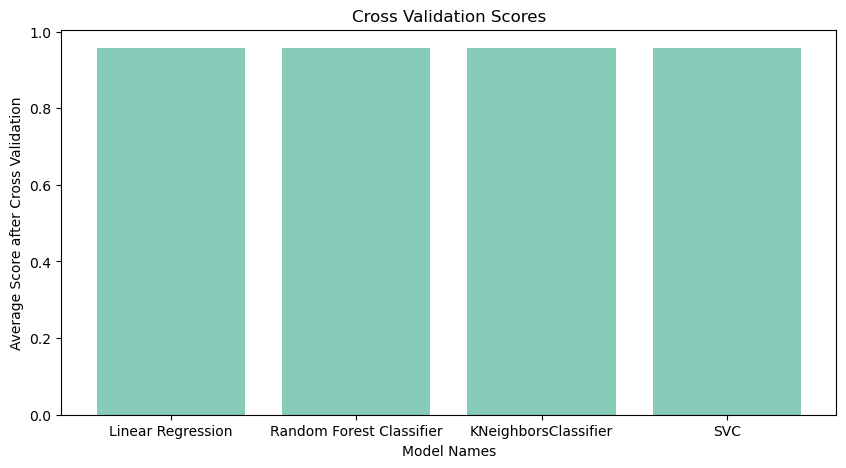

In [58]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(avg_score_model_comparision.columns, avg_score_model_comparision.iloc[0], color="#87CBB9")
plt.xlabel("Model Names")
plt.ylabel("Average Score after Cross Validation")
plt.xticks(rotation=0)
plt.title("Cross Validation Scores");

# Feature Importance

In [59]:
# get the feature names from the ColumnTransformer and OneHotEncoder
feature_names = transformer.named_transformers_['one_hot'].get_feature_names_out(categorical_features)
feature_names = list(feature_names)

# combine the feature names with the remaining numerical feature names
all_feature_names = feature_names + list(X.columns[len(categorical_features):])

In [60]:
all_feature_names

['gender_Female',
 'gender_Male',
 'ever_married_No',
 'ever_married_Yes',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Rural',
 'Residence_type_Urban',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [61]:
# create a DataFrame from the transformed data and feature names
one_hot_df = pd.DataFrame(transformed_X, columns=all_feature_names)

In [62]:
one_hot_df

,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,9046.0,67.0,0.0,1.0,228.69,36.6
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,31112.0,80.0,0.0,1.0,105.92,32.5
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,60182.0,49.0,0.0,0.0,171.23,34.4
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1665.0,79.0,1.0,0.0,174.12,24.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,56669.0,81.0,0.0,0.0,186.21,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,14180.0,13.0,0.0,0.0,103.08,18.6
4862,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,44873.0,81.0,0.0,0.0,125.20,40.0
4863,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,19723.0,35.0,0.0,0.0,82.99,30.6
4864,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,37544.0,51.0,0.0,0.0,166.29,25.6


In [63]:
def plot_features(columns, importances, n=10):
    df = pd.DataFrame({"features": columns,
                       "feature_importances": importances})
    df = df.sort_values("feature_importances", ascending=False).reset_index(drop=True)

    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()
    plt.show()

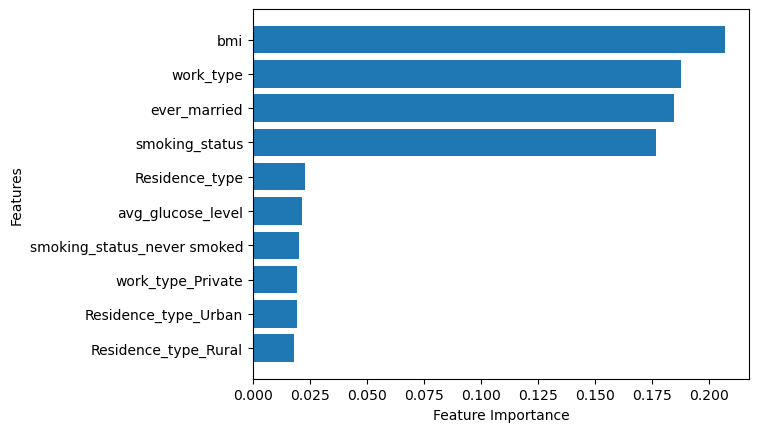

In [64]:
plot_features(all_feature_names, rfc.feature_importances_)